In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

#from download import download

#mpl.rcParams['figure.figsize'] = (8, 6)
#mpl.rcParams['axes.grid'] = False


In [2]:
df = pd.read_csv('C:\\Users\LENOVO\machine_learning\PRSA_Data_Shunyi_20130301-20170228.csv')

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [7]:
aq_df_ = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date,keep_date_col=True)

In [8]:
aq_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34151 non-null  float64       
 7   PM10                 34516 non-null  float64       
 8   SO2                  33768 non-null  float64       
 9   NO2                  33699 non-null  float64       
 10  CO                   32886 non-null  float64       
 11  O3                   33575 non-null  float64       
 12  TEMP                 35013 non-null  float64       
 13  PRES                 35013 non-

In [9]:
aq_df_['month']=pd.to_numeric(aq_df_['month'])

In [10]:
aq_df_.describe()

,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,6.522930,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,3.448752,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,1.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,4.000000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,7.000000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,10.000000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,12.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [11]:
aq_df_non_indexed=aq_df_.copy()

In [12]:
aq_df = aq_df_.set_index('year_month_day_hour')

In [13]:
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [14]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [15]:
aq_df.loc['2013-03-01':'2013-03-05']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05 19:00:00,116,2013,3,5,19,154.0,226.0,84.0,140.0,2200.0,61.0,7.3,1011.1,-5.1,0.0,NNE,1.3,Shunyi
2013-03-05 20:00:00,117,2013,3,5,20,193.0,234.0,87.0,145.0,2399.0,61.0,4.1,1011.4,-4.1,0.0,NNE,1.3,Shunyi
2013-03-05 21:00:00,118,2013,3,5,21,218.0,247.0,101.0,143.0,2799.0,61.0,5.0,1011.3,-5.1,0.0,N,1.5,Shunyi


In [16]:
aq_df.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,86.0,90.0,14.0,96.0,1700.0,3.0,-2.1,1027.1,-8.8,0.0,NaN,0.0,Shunyi
2015-12-31 20:00:00,24861,2015,12,31,20,133.0,136.0,21.0,95.0,2000.0,5.0,-1.7,1027.1,-8.7,0.0,SE,1.0,Shunyi
2015-12-31 21:00:00,24862,2015,12,31,21,167.0,171.0,26.0,95.0,2700.0,7.0,-1.9,1026.7,-8.6,0.0,N,1.6,Shunyi


In [17]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00     3.0
2013-03-01 01:00:00    12.0
2013-03-01 02:00:00    14.0
2013-03-01 03:00:00    12.0
2013-03-01 04:00:00    12.0
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='year_month_day_hour'>

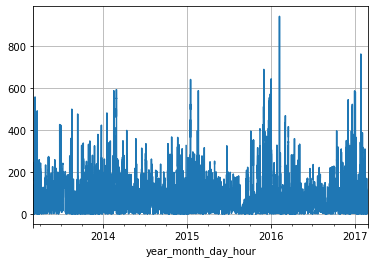

In [18]:
pm_data.plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

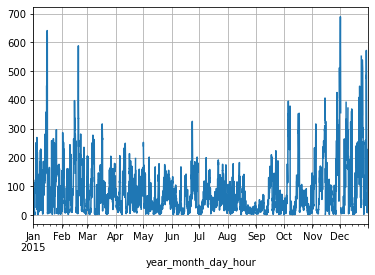

In [19]:
aq_df_2015=aq_df.loc['2015']
pm_data_2015=aq_df_2015['PM2.5']
pm_data_2015.plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

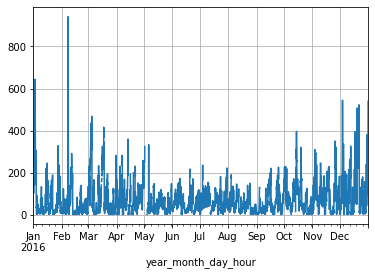

In [20]:
aq_df_2016=aq_df['2016']
pm_data_2016=aq_df_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [21]:
aq_df['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                        
        count        mean         std  min   25%   50%     75%    max
month                                                                
1      2200.0   87.681500   93.667864  3.0  16.0  59.0  134.00  644.0
2      1999.0   97.368684  111.533270  3.0  13.0  51.0  149.00  941.0
3      2201.0   94.540209   86.758302  3.0  19.0  71.0  140.00  469.0
4      2084.0   79.176583   59.680012  3.0  34.0  67.0  110.00  399.0
5      2157.0   57.507464   47.458248  3.0  23.0  44.0   77.00  360.0
6      2131.0   58.964711   48.137165  3.0  21.5  46.0   83.00  326.0
7      2196.0   73.831785   56.610975  3.0  31.0  60.0  105.00  336.0
8      2205.0   50.872834   40.867026  3.0  18.0  36.0   76.00  210.0
9      1998.0   55.759259   48.958636  3.0  16.0  40.0   82.75  239.0
10     2173.0   89.612057   87.554161  3.0  23.0  59.0  128.00  397.0
11     2135.0   97.527026   88.302877  3.0  22.0  73.0  146.00  512.0
12     2189.0  107.394975  123.421480  3.0  13.0  58.0  160.00  689.0

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

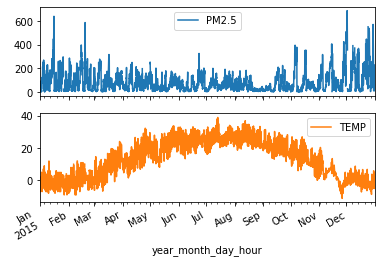

In [22]:
aq_df_2015=aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots=True)

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'TEMP'}>]], dtype=object)

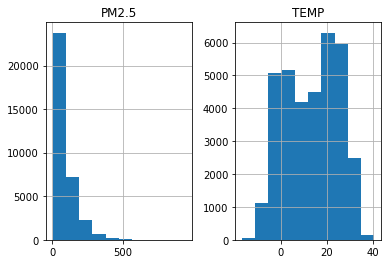

In [23]:
aq_df[['PM2.5','TEMP']].hist()

<AxesSubplot:ylabel='Density'>

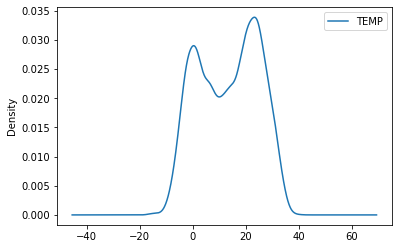

In [24]:
aq_df[['TEMP']].plot(kind='density')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

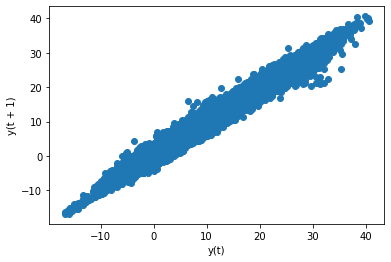

In [25]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

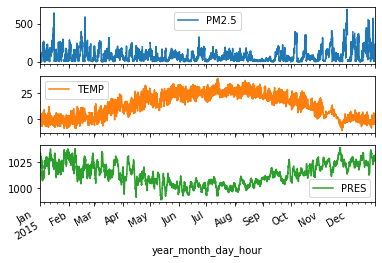

In [26]:
aq_df_2015=aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots=True)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

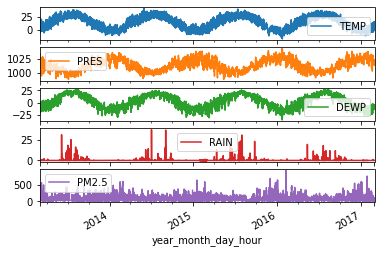

In [27]:
multi_data = aq_df[['TEMP','PRES','DEWP', 'RAIN','PM2.5']]
multi_data.plot(subplots=True)

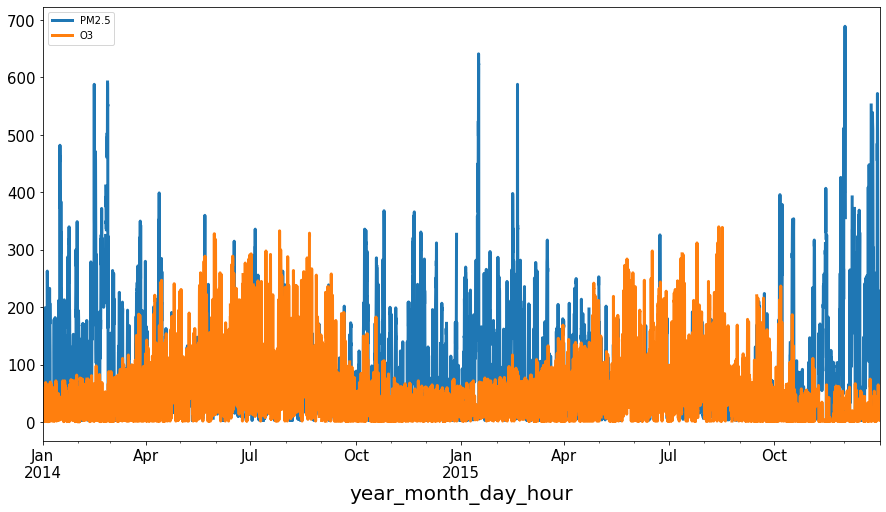

In [28]:
aq_df['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20);